In [37]:
# PLAN

    # 1. ESTIMATE HOW TARGET VARIABLE WILL BE AFFECTED BY CHANGES IN ANY OF THE FEATURES

        # HOW
            # EXPLORE DATA
            
        # ACTIONS
            # CALCULATE STATISTICAL PROPERTIES OF TARGET VARIABLE (MEAN, MEDIAN, MODE, STD, MAX, MIN)

    
    
    # 2A. CALCULATE PROPORTION OF VARIANCE IN TARGET VARIABLE THAT IS CAUSED BY THE INDEPENDENT VARIABLES

        # HOW
            # CALCULATE PERFORMANCE METRIC
            
        # ACTIONS
            # CALCULATE PERFORMANCE METRIC
            # SPLIT DATASET (TRAIN-TEST)

            
    
    # 2B. VERIFY SUCCESS OF TRAINING
        
        # HOW
            # TRAIN ALGORITHM THEN TEST FOR ACCURACY
        
        # ACTIONS
            # SPLIT DATASET (TRAIN-TEST)
    
    
    
    # 3. ESTIMATE OPTIMAL MAX DEPTH (NUMBER OF QUESTIONS BEFORE ALGORITHM MAKES PREDICTION)
    
        # HOW
            # VISUALIZE BIAS/VARIANCE TRADEOFF - Graphing your model's performance based on varying criteria (size of training set, complexity of model) can be beneficial in the analysis process, benefits include visualizing behavior that may not have been apparent from the results alone.

        # ACTIONS
            # USING MODELLEARNING METHOD OF VISUALS CLASS, VISUALIZE LEARNING CURVES (TRAINING AND TESTING) - WHAT HAPPENS TO THE LEARNING OF A MODEL AS THE SIZE OF THE TRAINING SET IS INCREASED?
            # USING MODELCOMPLEXITY METHOD OF VISUALS CLASS, VISUALIZE COMPLEXITY CURVES (TRAINING AND VALIDATION) - WHAT HAPPENS TO PERFORMANCE AS COMPLEXITY (MAXIMUM DEPTH) INCREASES
            # REPORT ON BIAS OR VARIANCE IN RESPONSE TO CHANGING MAX DEPTH (HIGH BIAS: HIGH UNCERTAINTY, OVER GENERALIZING. HIGH VARIANCE: OVERFITTING)


    
    # 4. OBTAIN BEST REGRESSOR
        
        # HOW
            # DEFINE A FUNCTION THAT FITS THE REGRESSOR TO A VARIETY OF DATASET SPLITS, WITH RESPECT TO A PREDEFINED PERFORMANCE METRIC, AND INCORPORATING A VARIETY OF MAX_DEPTH PARAMETERS
            
        # ACTIONS
            # DEFINE A FUNCTION THAT 
                # CREATES A GRID SEARCH OBJECT
                # TAKES IN PERFORMANCE METRIC
                # TAKES IN CROSS VALIDATION SETS (USING K-FOLD OR SHUFFLESPLIT)
                # OPTIMISES MAX-DEPTH
                # TAKES IN A REGRESSOR OBJECT
                # RETURNS THE BEST REGRESSOR
                
        
    
    # 5. PREDICT NEW TARGET VARIABLES
    
        # HOW
            # USE PREDICT METHOD OF REGRESSOR
            
        # ACTIONS
            # CALL FUNCTION FROM PREVIOUS STEP. PASS IN TRAINING DATA. ASSIGN TO REGRESSOR OBJECT.

    
    
    # 6. CALCULATE SENSITIVITY

        # HOW
            # USE PREDICTTRIALS METHOD OF VISUALS CLASS
            
        # ACTIONS
            # RUN THE PREDICTTRIALS FUNCTION TO RUN FIT_MODEL SEVERAL TIMES WITH DIFFERENT TRAINING AND TESTING SETS
            # SEE HOW PREDICTIONS CHANGE IN RESPONSE TO CHANGING DATASETS

        
    
    # 7. DISCUSS 
    
        # WHY
            # Justify or condemn results
            # Consider usefulness of study to similar or dissimilar studies        
        
        # QUESTIONS
            # In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.
            # How relevant today is data that was collected from 1978? How important is inflation?
            # Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
            # Is the model robust enough to make consistent predictions?
            # Would data collected in an urban city like Boston be applicable in a rural city?
            # Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?



            
            
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from scipy import stats


# Import supplementary visualizations code visuals.py
import visuals as vs # to do this i had to find the visuals file on the internet, copy all the code from it, and save it in the working directory for this project as a file i called visuals.py

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
 
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [38]:
# 1. PREDICT HOW TARGET VARIABLE WILL BE AFFECTED BY CHANGES IN ANY OF THE FEATURES



# EXPLORING (VIA MEAN, MEDIAN, MODE, STD, MIN, MAX) IS CRITICAL

# TO:

    # UNDERSTAND YOUR RESULTS
    # JUSTIFY YOUR RESULTS

    
    
# 1.1 CALCULATE STATISTICS
    
    
# min price
min_pr = np.min(prices)
print('min is ${}'.format(min_pr))


# max price
max_pr = np.max(prices)
print('max is ${}'.format(max_pr))


# mean price
mean_pr = np.mean(prices)
print('mean is ${}'.format(mean_pr))


# median price
med_pr = np.median(prices)
print('median is ${}'.format(med_pr))


# modal price
mod_pr = stats.mode(prices)
print('mode is {}'.format(mod_pr))


# std price
std_pr = np.std(prices)
print('std is ${}'.format(std_pr))

min is $105000
max is $1024800
mean is $454342.9447852761
median is $438900.0
mode is ModeResult(mode=array([525000], dtype=int64), count=array([8]))
std is $165171.13154429477


In [39]:
# 1.2 SUMMARIZE EFFECT OF EACH FEATURE ON TARGET VARIABLE

# Q: Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?
# A: 6 RM should have lower home prices than 7 RM


# Q: Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?
# A: 15 LSTAT should have higher home prices than 20 LSTAT


# Q: Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?
# A: 10 PTRATIO should have lower home prices than 15 PTRATIO


In [40]:
# 2. CALCULATE PROPORTION OF VARIANCE IN TARGET VARIABLE THAT IS CAUSED BY THE INDEPENDENT VARIABLES


# 2.1 CALCULATE PERFORMANCE METRIC

    # AIM
        
        # Measure the quality of your model by quantifying its performance over training and testing

    # CHOICE
    
        # The coefficient of determination R^2
        # A model with an R^2 of 0 is no better than a model that always predicts the mean of the target variable 
        # A model with an R^2 of 1 perfectly predicts the target variable
        
    # REASON FOR CHOICE
    
        # The R^2 score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables
        
        
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score



In [41]:
# 2.1 CALCULATE PERFORMANCE METRIC (CONT'D)

# Calculate the performance of this model

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])

print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


# Q: Would you consider this model to have successfully captured the variation of the target variable?
# A: Yes

# Q: Why or why not?
# A: Because, using this model, 92.3% of the variance in the dependent variable in predictable from the independent variables


Model has a coefficient of determination, R^2, of 0.923.


In [42]:
# 2.2 SPLIT DATASET

from sklearn.cross_validation import train_test_split

features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size = 0.2, random_state=0)

print('train test split was successful')

train test split was successful


In [43]:
# Q: What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
# A: Because it increases the probability that the model will create an optimal fit to the dataset. An optimal fit means that, with new data, themodel is less likely to overfit or underfit

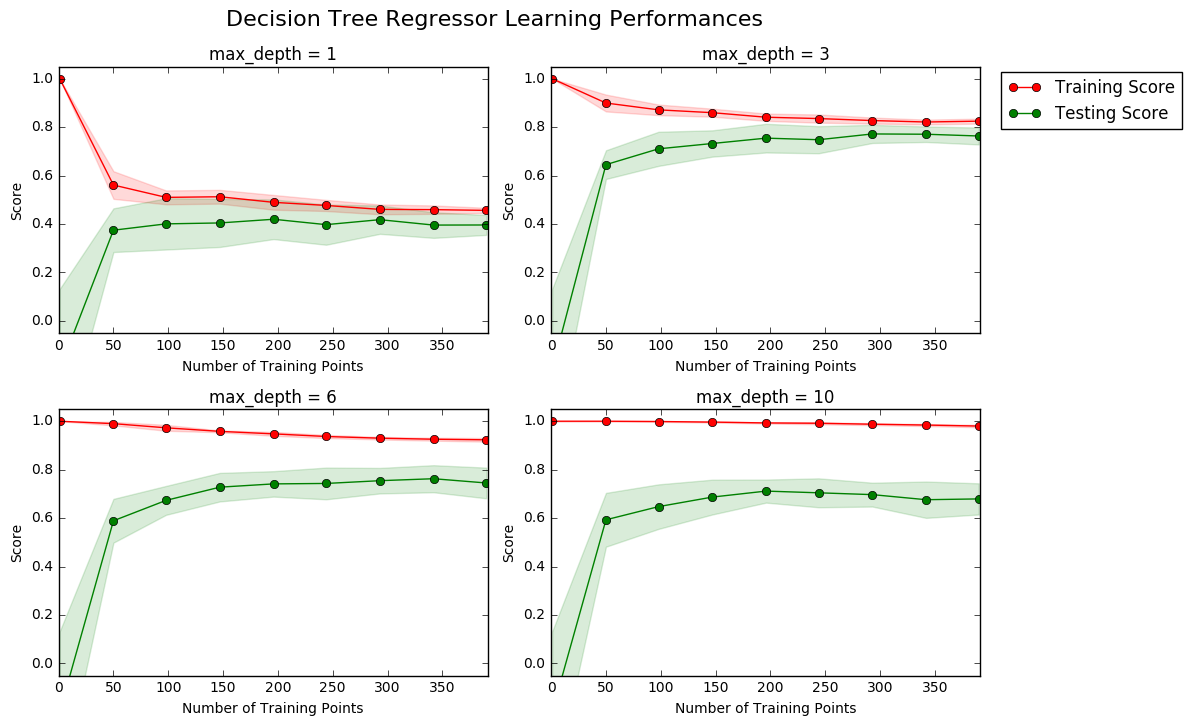

In [44]:
# 3. GUESS OPTIMAL MAX DEPTH
    
    
# 3.1 VISUALIZE LEARNING CURVE

vs.ModelLearning(features, prices)

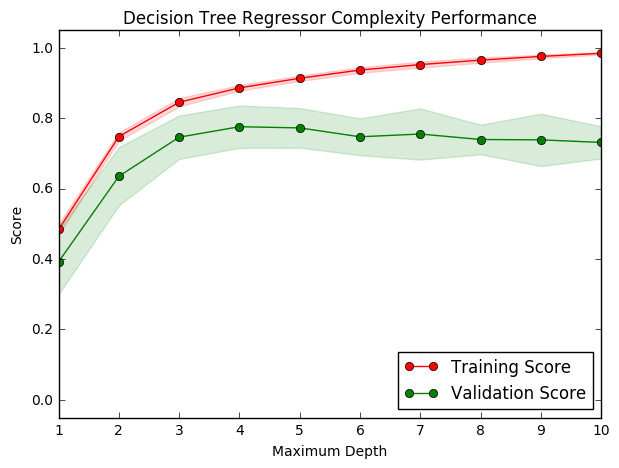

In [45]:
# 3.2 VISUALIZE COMPLEXITY CURVE

vs.ModelComplexity(features_train, prices_train)

In [46]:
# Q: Choose one of the graphs above and state the maximum depth for the model.
# A: Graph 1, max depth = 1

# Q: What happens to the score of the training curve as more training points are added? What about the testing curve?
# A: Training curve - falling score. Testing curve - generally rising curve

# Q: Would having more training points benefit the model?
# A: Not continuously. After a certain range of training points, the curves seem to begin to diverge

# Q: Hint: Are the learning curves converging to particular scores? 
# A: Yes before a certain range of values of the training points

# Q: Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary? 
# A: No especially if the cost is that you begin to incur high bias

# Q: Think about the pros and cons of adding more training points based on if the training and testing curves are converging.
# A: Pro - In max depths 1 and 3, the bias seems to be reducing
# A: Con - In max depths 6 and 10, the curves seem to be diverging

In [47]:
# Q: When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
# A: High bias

# Q: How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?
# A: High variance
# A: The shaded region around the learning curves

In [48]:
# Q: Which maximum depth do you think results in a model that best generalizes to unseen data?
# A: 4

# Q: What intuition lead you to this answer?
# A: Superior convergence, superior R^2 score, optimal bias

# Q: Hint: Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth?
# A: No, after max depth 4, the score generally begins to fall. The score rises again at max depth 8 but at that point the bias is not optimal


# Q: At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."
# A: max depth 4

In [49]:
# Q: What is the grid search technique?


# Q: How it can be applied to optimize a learning algorithm?


In [50]:
# Q: What is the k-fold cross-validation training technique?


# Q: What benefit does this technique provide for grid search when optimizing a model?

In [137]:
# 4. DEFINE FUNCTION THAT FITS REGRESSOR TO A VARIETY OF DATASET SPLITS WITH RESPECT TO A PREDEFINED PERFORMANCE METRIC AND INCORPORATING A VARIETY OF MAX_DEPTH PARAMETERS

    

# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    
    # Create cross-validation sets from the training data
    # cv_sets = KFold(n_splits=5, random_state=None, shuffle=False) # AttributeError: 'KFold' object has no attribute 'items' (ie lists dont have an 'items' attribute but dictionaries do)
    # cv_sets = ShuffleSplit(n=10, test_size = 0.20, random_state = 0) # TypeError: __init__() got an unexpected keyword argument 'n'
    # cv_sets = ShuffleSplit(test_size = 0.20, random_state = 0) # TypeError: __init__() missing 1 required positional argument: 'n'
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0) # TypeError: __init__() got an unexpected keyword argument 'n_splits' and, later # AttributeError: 'ShuffleSplit' object has no attribute 'items' (ie lists dont have an 'items' attribute but dictionaries do)
    # cv_sets = ShuffleSplit(n=X.shape[0], n_iter=10, test_size = 0.20, random_state = 0) # AttributeError: 'ShuffleSplit' object has no attribute 'items' and, later, TypeError: __init__() got an unexpected keyword argument 'n'
    # cv_sets = ShuffleSplit(n_splits=X.shape[0], n_iter=10, test_size = 0.20, random_state = 0) # TypeError: __init__() got an unexpected keyword argument 'n_iter'
    # cv_sets = ShuffleSplit(n_splits=X.shape[0], test_size = 0.20, random_state = 0) # AttributeError: 'ShuffleSplit' object has no attribute 'items'
    # cv_sets = ShuffleSplit(n_iter=10, test_size = 0.20, random_state = 0) # TypeError: __init__() got an unexpected keyword argument 'n_iter'


    
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    
    
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'C':[i for i in range(1,11)]} MAJOR PROBLEM!!!! POSSIBLY RESPONSIBLE FOR ALL THE ERRORS LISTED TWO STEPS ABOVE #ValueError: Invalid parameter C for estimator DecisionTreeRegressor. Check the list of available parameters with `estimator.get_params().keys()`.
    #params = {"C":[1,2,3,4,5,6,7,8,9,10]} 
    params = {"max_depth":[1,2,3,4,5,6,7,8,9,10]} 
    #params = {'C':[1,2,3,4,5,6,7,8,9,10]} MAJOR PROBLEM!!!! POSSIBLY RESPONSIBLE FOR ALL THE ERRORS LISTED TWO STEPS ABOVE #ValueError: Invalid parameter C for estimator DecisionTreeRegressor. Check the list of available parameters with `estimator.get_params().keys()`.

    
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    
    
    
    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    #grid = GridSearchCV(regressor, params, scoring_fnc, cv_sets) # MAJOR PROBLEM!!!! FULLY RESPONSIBLE FOR ALL THE ERRORS LISTED TWO STEPS ABOVE  AttributeError: 'ShuffleSplit' object has no attribute 'items'

    # MORAL OF THE STORY: ASSIGN ALL YOUR GRIDSEARCHCV ARGUMENTS IN FULL USING THE ASSIGNMENT OPERATOR '=' AS SHOWN BELOW!!!
    
    grid = GridSearchCV(estimator = regressor, param_grid=params, scoring=scoring_fnc, cv= cv_sets) # YIELDS MAX DEPTH OF 4
    #grid = GridSearchCV(estimator = regressor, param_grid=params, scoring=scoring_fnc, cv= None) # YIELDS MAX DEPTH OF 5
    #grid = GridSearchCV(estimator = regressor, param_grid=params, scoring=scoring_fnc, cv= None, refit=True) # doesn't seem to make a difference

    

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    #return grid.best_estimator MAJOR PROBLEM!!!! VERY WRONG!!!!
    return grid.best_estimator_ # THIS RETURNS THE BEST REGRESSOR




In [55]:
# Q: What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?
# A: Maximum depth of optimal model = 4
# A: Matches my guess in Question 6


In [138]:
# To obtain the best regressor, take the function you defined above and fit it to the training data
reg = fit_model(features_train, prices_train) # reg IS THEREFORE THE BEST REGRESSOR

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [140]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [ ]:
# Q: What price would you recommend each client sell his/her home at?
# Q: Do these prices seem reasonable given the values for the respective features?

In [141]:
# Sensitivity

vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
